1.3.3

In [27]:
import numpy as np
import pandas as pd
from scipy.integrate import ode, solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import networkx as nx
from random import random,choice,sample
import math

In [130]:
path='COVID19_GA.csv'
content = pd.read_csv(path)
obI=content['cases']
obR=content['deaths']


In [131]:
I0=obI[0]
R0=obR[0]
S0=1-R0-I0
max_time=len(obI)
times=np.linspace(0,max_time,max_time)
init=[S0, I0, R0]

In [139]:
def sir_model(times,parms,init):
    b,g = parms
    S,I,R = init
    dS = -b*S*I
    dI = b*S*I-g*I
    dR = g*I
    return[dS, dI, dR]

def help_func(parms):
    sol = solve_ivp(fun=lambda t, y: sir_model(t,parms,init),t_span=[min(np.linspace(0,max_time,max_time)),max(np.linspace(0,max_time,max_time))],y0=init, t_eval=np.linspace(0,max_time,max_time))
    St, It, Rt=sol["y"][0],sol["y"][1],sol["y"][2]
    count=0
    for i in range (len(Rt)): 
        step = (Rt[i]-obR[i])**2
        count+=step
    return count

In [134]:
minimize(help_func,[0.01,0.0001])

      fun: 1.8202355424922976e-06
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([-1.13686838e-13,  5.30398836e-09])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([1.00000000e-02, 4.87922931e-05])

In [140]:
b = 1e-2
g = 4.87922931e-05
parms = [b,g]
sol = solve_ivp(fun=lambda t, y: sir_model(t,parms,init),t_span=[min(np.linspace(0,max_time,max_time)),max(np.linspace(0,max_time,max_time))],y0=init, t_eval=np.linspace(0,max_time,max_time))
out = pd.DataFrame({"t":sol["t"],"S":sol["y"][0],"I":sol["y"][1],"R":sol["y"][2]})


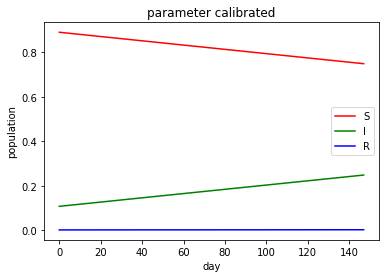

In [136]:
plt.plot('t','S', color='red', data=out)
plt.plot('t','I', color='green',data=out)
plt.plot('t','R', color='blue',data=out)
plt.xlabel('day')
plt.ylabel('population')
plt.title("parameter calibrated")
legend=plt.legend()

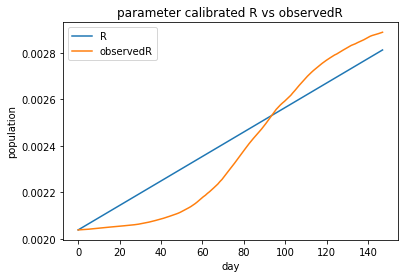

In [141]:
out2 = out.assign(observedR = content['deaths'])

plt.plot('t','R', data=out2)
plt.plot('t','observedR', data=out2)
plt.title("parameter calibrated R vs observedR")
plt.xlabel('day')
plt.ylabel('population')
legend=plt.legend()

1.3.4

In [94]:
graph500=nx.complete_graph(500, create_using=None)

In [142]:
N = 500
max_time = 900
I0=obI[0]
R0=obR[0]
S0=1-R0-I0
I0 = math.floor(I0*N)
S0= math.floor(S0*N)
R0 = math.floor(N-I0-S0)

In [143]:
def sir_model2(N, b, g, S0, I0, R0, max_time, graph):
    It=[]
    Rt=[]
    St=[]
    for day in range(max_time):
        if day == 0: 
            ilist=sample(list(graph.nodes()), I0)
            rlist = []
            slist = [x for x in list(graph.nodes()) if x not in ilist and x not in rlist]

        else:
            for node in list(graph.nodes()): 
                if node in slist:
                    nb = choice(list(graph.nodes()))
                    if nb in ilist and random() <= b:      
                        ilist.append(node)
                        slist.remove(node)
                elif node in ilist and random() <= g:
                    ilist.remove(node)
                    rlist.append(node)
        It.append(len(ilist)/N)
        Rt.append(len(rlist)/N)
        St.append(len(slist)/N)
    return(St,It,Rt)



In [144]:
s50=[]
r50=[]
i50=[]
for i in range(50):
    S,I,R=sir_model2(N, b, g, S0, I0, R0, max_time=900,graph=graph500)
    i50.append(I)
    r50.append(R)
    s50.append(S)

out500=pd.DataFrame({"t":list(range(1,max_time+1)),"S":[sum(x)/50 for x in zip(*s50)],"I":[sum(x)/50 for x in zip(*i50)],"R":[sum(x)/50 for x in zip(*r50)]})

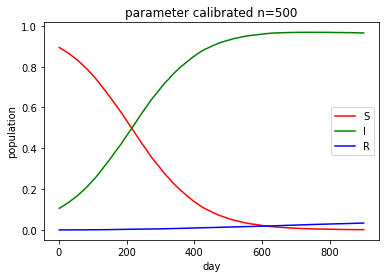

In [148]:
plt.plot('t','S', color='red', data=out500)
plt.plot('t','I', color='green',data=out500)
plt.plot('t','R', color='blue',data=out500)
plt.title("parameter calibrated n=500")
plt.xlabel('day')
plt.ylabel('population')
legend=plt.legend()

In [149]:
graph50=nx.complete_graph(50, create_using=None)

In [150]:
N = 50
max_time = 900
I0=obI[0]
R0=obR[0]
S0=1-R0-I0
I0 = math.floor(I0*N)
S0= math.floor(S0*N)
R0 = math.floor(N-I0-S0)

In [151]:
s50=[]
r50=[]
i50=[]
for i in range(50):
    S,I,R=sir_model2(N, b, g, S0, I0, R0, max_time,graph50)
    i50.append(I)
    r50.append(R)
    s50.append(S)

out50=pd.DataFrame({"t":list(range(1,max_time+1)),"S":[sum(x)/50 for x in zip(*s50)],"I":[sum(x)/50 for x in zip(*i50)],"R":[sum(x)/50 for x in zip(*r50)]})

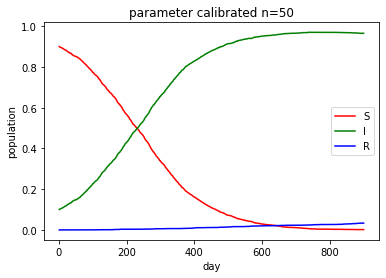

In [152]:
plt.plot('t','S', color='red', data=out50)
plt.plot('t','I', color='green',data=out50)
plt.plot('t','R', color='blue',data=out50)
plt.title("parameter calibrated n=50")
plt.xlabel('day')
plt.ylabel('population')
legend=plt.legend()